 OPTION PREMIUMS 
Call 2.75: 0.0315 CNY
Put 2.75: 0.0225 CNY
Call 2.85: 0.0100 CNY
Put 2.65: 0.0100 CNY


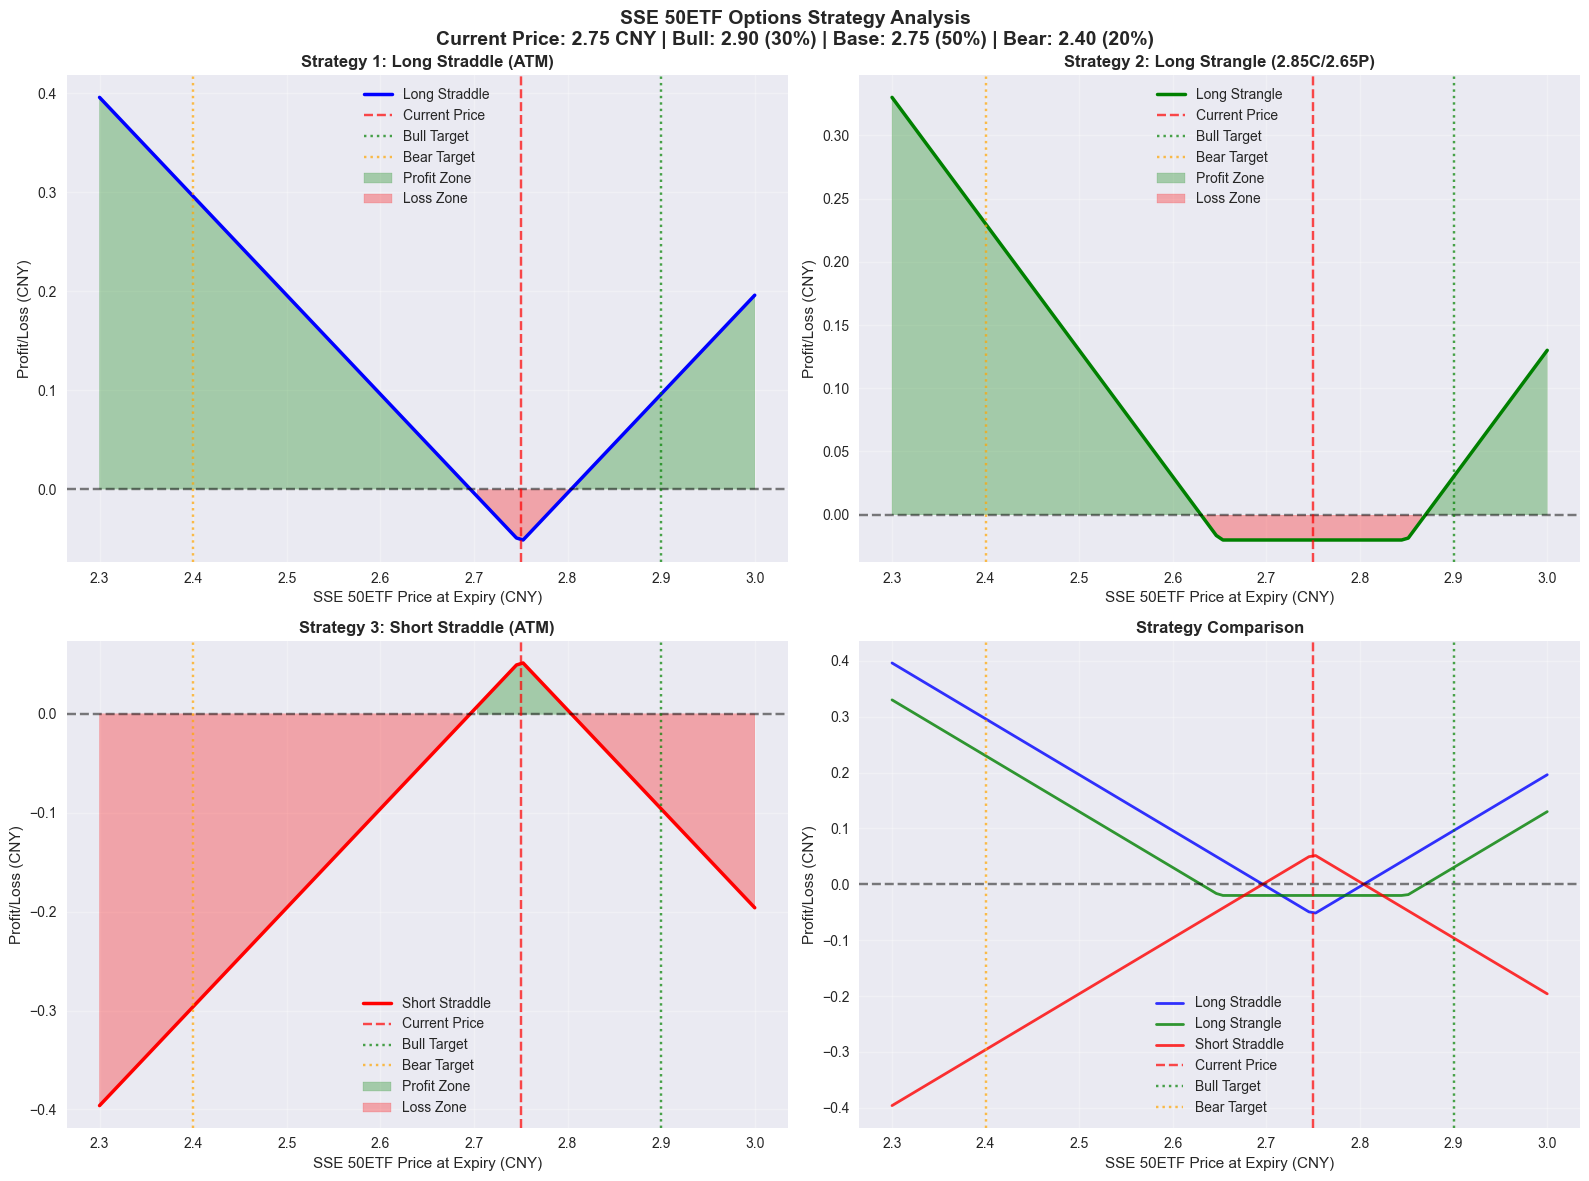

----------------------------------------------------------------------
STRATEGY ANALYSIS SUMMARY
----------------------------------------------------------------------
         Strategy  Initial Cost  Expected Return  Bull Scenario P&L  \
0   Long Straddle        0.0539           0.0611             0.0961   
1   Long Strangle        0.0200           0.0450             0.0300   
2  Short Straddle       -0.0539          -0.0611            -0.0961   

   Base Scenario P&L  Bear Scenario P&L  
0            -0.0539             0.2961  
1            -0.0200             0.2300  
2             0.0539            -0.2961  

--- BREAKEVEN POINTS ---
Long Straddle: [2.696, 2.802]
Long Strangle: [2.625, 2.866]
Short Straddle: [2.696, 2.802]

--- RECOMMENDATION ---
Based on expected return: Long Straddle
Expected return: 0.0611 CNY

--- RISK ANALYSIS ---
Long Straddle: High premium cost, needs significant movement
Long Strangle: Lower cost, wider breakeven range
Short Straddle: Profits from low vola

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Market data from analysis
current_price = 2.75
bull_target = 2.90
base_target = 2.75
bear_target = 2.40

# Probabilities
prob_bull = 0.30
prob_base = 0.50
prob_bear = 0.20

# Price range for analysis
price_range = np.linspace(2.30, 3.00, 100)

# Option pricing assumptions (simplified Black-Scholes estimates)
# Using low volatility (6.02%) and ~ 2 months to expiry
def estimate_option_price(strike, spot, option_type='call', volatility=0.0602, time_to_expiry=60/365, risk_free_rate=0.02):
    """Simplified option pricing for demonstration"""
    from scipy.stats import norm
    import math
    
    d1 = (math.log(spot/strike) + (risk_free_rate + 0.5 * volatility**2) * time_to_expiry) / (volatility * math.sqrt(time_to_expiry))
    d2 = d1 - volatility * math.sqrt(time_to_expiry)
    
    if option_type == 'call':
        price = spot * norm.cdf(d1) - strike * math.exp(-risk_free_rate * time_to_expiry) * norm.cdf(d2)
    else:  # put
        price = strike * math.exp(-risk_free_rate * time_to_expiry) * norm.cdf(-d2) - spot * norm.cdf(-d1)
    
    return max(price, 0.01)  # Minimum price of 0.01

# Calculate option premiums
call_275_premium = estimate_option_price(2.75, 2.75, 'call')
put_275_premium = estimate_option_price(2.75, 2.75, 'put')
call_285_premium = estimate_option_price(2.85, 2.75, 'call')
put_265_premium = estimate_option_price(2.65, 2.75, 'put')

print(" OPTION PREMIUMS ")
print(f"Call 2.75: {call_275_premium:.4f} CNY")
print(f"Put 2.75: {put_275_premium:.4f} CNY")
print(f"Call 2.85: {call_285_premium:.4f} CNY")
print(f"Put 2.65: {put_265_premium:.4f} CNY")

# Strategy 1: Long Straddle (2.75 strike)
def long_straddle_payoff(prices, strike=2.75):
    call_payoff = np.maximum(prices - strike, 0) - call_275_premium
    put_payoff = np.maximum(strike - prices, 0) - put_275_premium
    return call_payoff + put_payoff

# Strategy 2: Long Strangle (Call 2.85, Put 2.65)
def long_strangle_payoff(prices, call_strike=2.85, put_strike=2.65):
    call_payoff = np.maximum(prices - call_strike, 0) - call_285_premium
    put_payoff = np.maximum(put_strike - prices, 0) - put_265_premium
    return call_payoff + put_payoff

# Strategy 3: Short Straddle (2.75 strike)
def short_straddle_payoff(prices, strike=2.75):
    call_payoff = -(np.maximum(prices - strike, 0) - call_275_premium)
    put_payoff = -(np.maximum(strike - prices, 0) - put_275_premium)
    return call_payoff + put_payoff

# Calculate payoffs
straddle_payoffs = long_straddle_payoff(price_range)
strangle_payoffs = long_strangle_payoff(price_range)
short_straddle_payoffs = short_straddle_payoff(price_range)

# Create comprehensive analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SSE 50ETF Options Strategy Analysis\nCurrent Price: 2.75 CNY | Bull: 2.90 (30%) | Base: 2.75 (50%) | Bear: 2.40 (20%)', 
             fontsize=14, fontweight='bold')

# Strategy 1: Long Straddle
ax1.plot(price_range, straddle_payoffs, 'b-', linewidth=2.5, label='Long Straddle')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax1.axvline(x=current_price, color='red', linestyle='--', alpha=0.7, label='Current Price')
ax1.axvline(x=bull_target, color='green', linestyle=':', alpha=0.7, label='Bull Target')
ax1.axvline(x=bear_target, color='orange', linestyle=':', alpha=0.7, label='Bear Target')
ax1.fill_between(price_range, straddle_payoffs, 0, where=(straddle_payoffs > 0), 
                 color='green', alpha=0.3, label='Profit Zone')
ax1.fill_between(price_range, straddle_payoffs, 0, where=(straddle_payoffs < 0), 
                 color='red', alpha=0.3, label='Loss Zone')
ax1.set_title('Strategy 1: Long Straddle (ATM)', fontweight='bold')
ax1.set_xlabel('SSE 50ETF Price at Expiry (CNY)')
ax1.set_ylabel('Profit/Loss (CNY)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Strategy 2: Long Strangle
ax2.plot(price_range, strangle_payoffs, 'g-', linewidth=2.5, label='Long Strangle')
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.axvline(x=current_price, color='red', linestyle='--', alpha=0.7, label='Current Price')
ax2.axvline(x=bull_target, color='green', linestyle=':', alpha=0.7, label='Bull Target')
ax2.axvline(x=bear_target, color='orange', linestyle=':', alpha=0.7, label='Bear Target')
ax2.fill_between(price_range, strangle_payoffs, 0, where=(strangle_payoffs > 0), 
                 color='green', alpha=0.3, label='Profit Zone')
ax2.fill_between(price_range, strangle_payoffs, 0, where=(strangle_payoffs < 0), 
                 color='red', alpha=0.3, label='Loss Zone')
ax2.set_title('Strategy 2: Long Strangle (2.85C/2.65P)', fontweight='bold')
ax2.set_xlabel('SSE 50ETF Price at Expiry (CNY)')
ax2.set_ylabel('Profit/Loss (CNY)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Strategy 3: Short Straddle
ax3.plot(price_range, short_straddle_payoffs, 'r-', linewidth=2.5, label='Short Straddle')
ax3.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax3.axvline(x=current_price, color='red', linestyle='--', alpha=0.7, label='Current Price')
ax3.axvline(x=bull_target, color='green', linestyle=':', alpha=0.7, label='Bull Target')
ax3.axvline(x=bear_target, color='orange', linestyle=':', alpha=0.7, label='Bear Target')
ax3.fill_between(price_range, short_straddle_payoffs, 0, where=(short_straddle_payoffs > 0), 
                 color='green', alpha=0.3, label='Profit Zone')
ax3.fill_between(price_range, short_straddle_payoffs, 0, where=(short_straddle_payoffs < 0), 
                 color='red', alpha=0.3, label='Loss Zone')
ax3.set_title('Strategy 3: Short Straddle (ATM)', fontweight='bold')
ax3.set_xlabel('SSE 50ETF Price at Expiry (CNY)')
ax3.set_ylabel('Profit/Loss (CNY)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Comparison of all strategies
ax4.plot(price_range, straddle_payoffs, 'b-', linewidth=2, label='Long Straddle', alpha=0.8)
ax4.plot(price_range, strangle_payoffs, 'g-', linewidth=2, label='Long Strangle', alpha=0.8)
ax4.plot(price_range, short_straddle_payoffs, 'r-', linewidth=2, label='Short Straddle', alpha=0.8)
ax4.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax4.axvline(x=current_price, color='red', linestyle='--', alpha=0.7, label='Current Price')
ax4.axvline(x=bull_target, color='green', linestyle=':', alpha=0.7, label='Bull Target')
ax4.axvline(x=bear_target, color='orange', linestyle=':', alpha=0.7, label='Bear Target')
ax4.set_title('Strategy Comparison', fontweight='bold')
ax4.set_xlabel('SSE 50ETF Price at Expiry (CNY)')
ax4.set_ylabel('Profit/Loss (CNY)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate expected returns based on scenario probabilities
def calculate_expected_return(payoff_func, scenarios):
    returns = []
    for price, prob in scenarios:
        if payoff_func == long_straddle_payoff:
            payoff = long_straddle_payoff(np.array([price]))[0]
        elif payoff_func == long_strangle_payoff:
            payoff = long_strangle_payoff(np.array([price]))[0]
        else:  # short_straddle_payoff
            payoff = short_straddle_payoff(np.array([price]))[0]
        returns.append(payoff * prob)
    return sum(returns)

scenarios = [(bull_target, prob_bull), (base_target, prob_base), (bear_target, prob_bear)]

# Expected returns
long_straddle_er = calculate_expected_return(long_straddle_payoff, scenarios)
long_strangle_er = calculate_expected_return(long_strangle_payoff, scenarios)
short_straddle_er = calculate_expected_return(short_straddle_payoff, scenarios)

# Breakeven analysis
def find_breakevens(payoff_func):
    breakevens = []
    for i in range(len(price_range)-1):
        if payoff_func == long_straddle_payoff:
            payoffs = long_straddle_payoff(price_range)
        elif payoff_func == long_strangle_payoff:
            payoffs = long_strangle_payoff(price_range)
        else:
            payoffs = short_straddle_payoff(price_range)
        
        if payoffs[i] * payoffs[i+1] < 0:  # Sign change indicates breakeven
            breakevens.append(price_range[i])
    return breakevens

# Calculate breakevens
straddle_be = find_breakevens(long_straddle_payoff)
strangle_be = find_breakevens(long_strangle_payoff)
short_straddle_be = find_breakevens(short_straddle_payoff)

# Summary table
summary_data = {
    'Strategy': ['Long Straddle', 'Long Strangle', 'Short Straddle'],
    'Initial Cost': [call_275_premium + put_275_premium, 
                    call_285_premium + put_265_premium, 
                    -(call_275_premium + put_275_premium)],
    'Expected Return': [long_straddle_er, long_strangle_er, short_straddle_er],
    'Bull Scenario P&L': [long_straddle_payoff(np.array([bull_target]))[0],
                         long_strangle_payoff(np.array([bull_target]))[0],
                         short_straddle_payoff(np.array([bull_target]))[0]],
    'Base Scenario P&L': [long_straddle_payoff(np.array([base_target]))[0],
                         long_strangle_payoff(np.array([base_target]))[0],
                         short_straddle_payoff(np.array([base_target]))[0]],
    'Bear Scenario P&L': [long_straddle_payoff(np.array([bear_target]))[0],
                         long_strangle_payoff(np.array([bear_target]))[0],
                         short_straddle_payoff(np.array([bear_target]))[0]]
}

summary_df = pd.DataFrame(summary_data)

print("-"*70)
print("STRATEGY ANALYSIS SUMMARY")
print("-"*70)
print(summary_df.round(4))

print(f"\n--- BREAKEVEN POINTS ---")
print(f"Long Straddle: {[round(x, 3) for x in straddle_be]}")
print(f"Long Strangle: {[round(x, 3) for x in strangle_be]}")
print(f"Short Straddle: {[round(x, 3) for x in short_straddle_be]}")

print(f"\n--- RECOMMENDATION ---")
best_strategy_idx = np.argmax([long_straddle_er, long_strangle_er, short_straddle_er])
strategies = ['Long Straddle', 'Long Strangle', 'Short Straddle']
print(f"Based on expected return: {strategies[best_strategy_idx]}")
print(f"Expected return: {max(long_straddle_er, long_strangle_er, short_straddle_er):.4f} CNY")

# Risk analysis
print(f"\n--- RISK ANALYSIS ---")
print("Long Straddle: High premium cost, needs significant movement")
print("Long Strangle: Lower cost, wider breakeven range")  
print("Short Straddle: Profits from low volatility, limited upside, unlimited downside risk")

print(f"\n--- MARKET OUTLOOK ALIGNMENT ---")
print("Given 50% probability of Base scenario (price stays at 2.75):")
print("- Long strategies lose money in Base scenario")
print("- Short Straddle profits maximally in Base scenario")
print("- Current low volatility (6.02%) favors premium selling strategies")